In [158]:
import pandas as pd # import library
import numpy as np # import library
import matplotlib.pyplot as plot # import visualization package

df = pd.read_csv (r'/Users/rebeccagarratt/Downloads/data.csv') # read sample data into new dataframe
mean = df["order_amount"].mean() # calculate mean order_amount from dataframe
print("The average order value, AOV, is: $",'{0:.2f}'.format(mean), ". This is consistent with the information provided in the challenge, however the value is unexpected with what we know about shoe prices.");

The mean order amount is: $ 3145.13 . This is consistent with the information provided in the challenge, however the value is unexpected with what we know about shoe prices.


### Question 1(a) - Detect Problem with Dataset

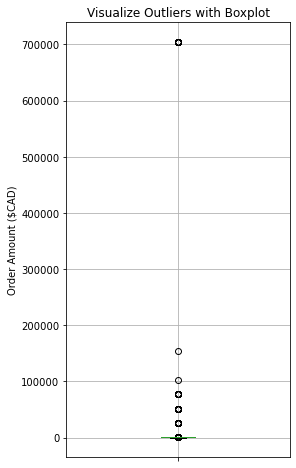

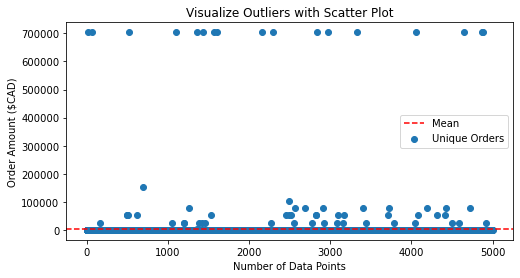

In [187]:
fig, ax = plot.subplots(figsize=(4,8)) # use visualization package to see outliers with a boxplot
ax = df.boxplot(['order_amount']) 
ax.set_title('Visualize Outliers with Boxplot')
ax.set_ylabel('Order Amount ($CAD)')
plot.xticks([1], [''])

fig, ax = plot.subplots(figsize=(8,4)) # use visualization package to see outliers with a scatter plot
ax.scatter(df['order_id'], df['order_amount'],label='Unique Orders')
ax.set_title('Visualize Outliers with Scatter Plot')
ax.set_xlabel('Number of Data Points')
ax.set_ylabel('Order Amount ($CAD)')
ax.axhline(mean,color='red',ls='--',label="Mean")
ax.legend(loc='best') 
plot.show()


### Question 1(b) - Determine Metric to Report 

In [160]:
# find where majority of the data lies
a = df.order_amount.quantile(0.95) # 95th percentile
print("95% of orders are less than: $", '{0:.2f}'.format(a), ". Let's recalculate the AOV using data in the 95th percentile.")

95% of orders are less than: $ 640.00 . Let's recalculate the average order value, AOV, using data in the 95th percentile.


### Question 1(c) - New Average Order Value

The AOV of the 95th percentile is: $ 284.93 .


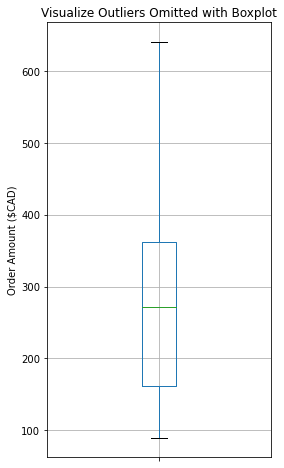

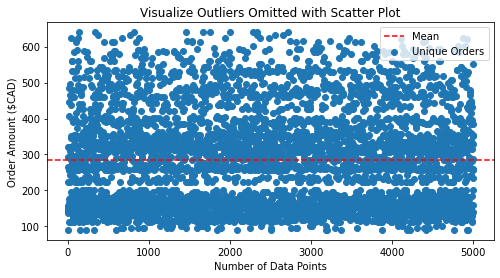

In [190]:
limit = a # set a limit equal to the 95th percentile
df2 = df[(df['order_amount'] <= limit)] # allocate values in the 95th percentile of the order_amount to new dataframe
mean2 = (df2['order_amount'].mean()) # calculate mean of the order_amount in new dataframe
print("The AOV of the 95th percentile is: $", '{0:.2f}'.format(mean2),".");

fig, ax = plot.subplots(figsize=(4,8)) # use visualization package to see outliers REMOVED with a boxplot
ax = df2.boxplot(['order_amount']) 
ax.set_title('Visualize Outliers Omitted with Boxplot')
ax.set_ylabel('Order Amount ($CAD)')
plot.xticks([1], [''])

fig, ax = plot.subplots(figsize=(8,4)) # use visualization package to see outliers REMOVED with a scatter plot
ax.scatter(df2['order_id'], df2['order_amount'],label='Unique Orders')
ax.set_title('Visualize Outliers Omitted with Scatter Plot')
ax.set_xlabel('Number of Data Points')
ax.set_ylabel('Order Amount ($CAD)')
ax.axhline(mean2,color='red',ls='--',label="Mean")
ax.legend(loc='best') 
plot.show()

### Additional Observations

The following figure has a histogram of order amounts in the original dataframe, which once again highlights that most orders are observed in the lower range of the order values.


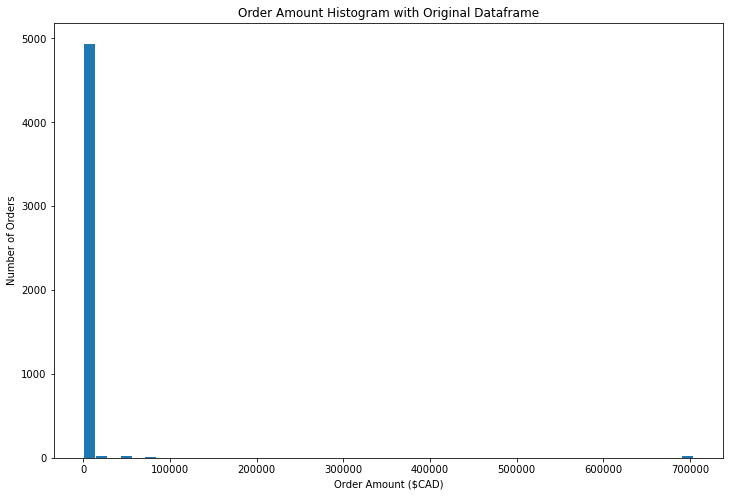

The following figure has a histogram of order amounts in the 95th percentile in the new dataframe. The histogram is multi-modal, likely corresponding to varying order sizes.


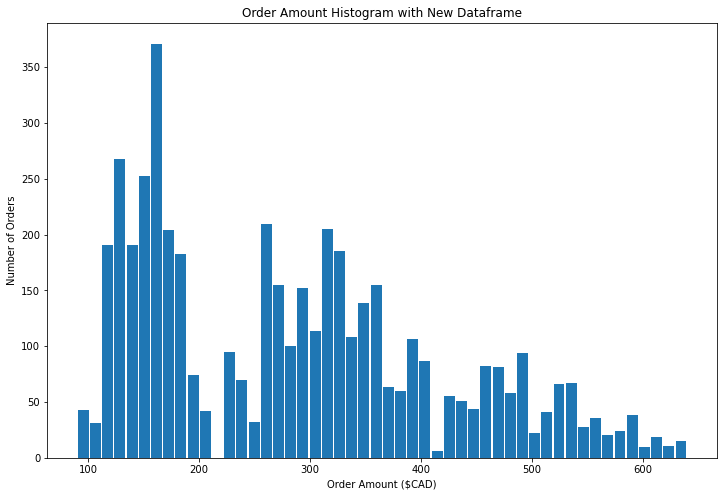

In [178]:
# Show Order Amount Histogram with Original Dataframe
print("The following figure has a histogram of order amounts in the original dataframe, which once again highlights that most orders are observed in the lower range of the order values.")
ax = df.hist(column='order_amount', bins=50, grid=False, figsize=(12,8), zorder=2, rwidth=0.9, sharey = True, sharex = True)
plot.title('Order Amount Histogram with Original Dataframe')
plot.xlabel('Order Amount ($CAD)')
plot.ylabel('Number of Orders')
plot.show()

# Show Order Amount Histogram with New Dataframe
print("The following figure has a histogram of order amounts in the 95th percentile in the new dataframe. The histogram is multi-modal, likely corresponding to varying order sizes.")
ax = df2.hist(column='order_amount', bins=50, grid=False, figsize=(12,8), zorder=2, rwidth=0.9, sharey = True, sharex = True)
plot.title('Order Amount Histogram with New Dataframe')
plot.xlabel('Order Amount ($CAD)')
plot.ylabel('Number of Orders')
plot.show()